In [432]:
import pandas as pd

In [433]:
nomes_f = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [434]:
nomes_m = pd.read_json('https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [435]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [436]:
frames = [nomes_f, nomes_m]

In [437]:
nomes = pd.concat(frames)['nome'].to_frame()

In [438]:
nomes.head(10)

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
5,JULIANA
6,MARCIA
7,FERNANDA
8,PATRICIA
9,ALINE


# Incluindo ID dos Alunos

In [439]:
import numpy as np
np.random.seed(123)

In [440]:
total_alunos = len(nomes)
total_alunos

400

In [441]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [442]:
nomes.head(10)


,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
5,JULIANA,310
6,MARCIA,55
7,FERNANDA,288
8,PATRICIA,379
9,ALINE,92


In [443]:
dominios = ['@dominiodoemail.com.br', '@servicodeemail.com']
nomes ['dominio']= np.random.choice(dominios, total_alunos)

In [444]:
nomes.sample(5)

,nome,id_aluno,dominio
46,FABIANA,358,@servicodeemail.com
38,DIEGO,294,@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br
119,MOISES,4,@servicodeemail.com
101,GISELE,298,@servicodeemail.com


In [445]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [446]:
nomes.head(10)

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodeemail.com,ana@servicodeemail.com
2,FRANCISCA,304,@servicodeemail.com,francisca@servicodeemail.com
3,ANTONIA,156,@servicodeemail.com,antonia@servicodeemail.com
4,ADRIANA,343,@servicodeemail.com,adriana@servicodeemail.com
5,JULIANA,310,@dominiodoemail.com.br,juliana@dominiodoemail.com.br
6,MARCIA,55,@dominiodoemail.com.br,marcia@dominiodoemail.com.br
7,FERNANDA,288,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br
8,PATRICIA,379,@servicodeemail.com,patricia@servicodeemail.com
9,ALINE,92,@servicodeemail.com,aline@servicodeemail.com


# Criando a tabela Cursos 

In [447]:
!pip3 install html5lib


In [448]:
!pip3 install lxml

In [449]:
import html5lib 

In [450]:
url= 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [451]:
cursos = cursos[0]

In [452]:
type(cursos)

pandas.core.frame.DataFrame

# Alterando o index de cursos

In [453]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [454]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [455]:
cursos['id'] = cursos.index + 1

In [456]:
cursos 

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [457]:
cursos = cursos.set_index('id')

In [458]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [459]:
nomes ['matriculas'] = np.random.exponential(size = total_alunos).astype(int)

In [460]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,0
1,ANA,43,@servicodeemail.com,ana@servicodeemail.com,2
2,FRANCISCA,304,@servicodeemail.com,francisca@servicodeemail.com,2
3,ANTONIA,156,@servicodeemail.com,antonia@servicodeemail.com,1
4,ADRIANA,343,@servicodeemail.com,adriana@servicodeemail.com,0


In [461]:
nomes ['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [462]:
nomes.head(5)

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodeemail.com,ana@servicodeemail.com,1
2,FRANCISCA,304,@servicodeemail.com,francisca@servicodeemail.com,1
3,ANTONIA,156,@servicodeemail.com,antonia@servicodeemail.com,1
4,ADRIANA,343,@servicodeemail.com,adriana@servicodeemail.com,3


In [463]:
nomes.matriculas.describe()

count    400.0000
mean       2.1450
std        1.5427
min        1.0000
25%        1.0000
50%        2.0000
75%        3.0000
max       12.0000
Name: matriculas, dtype: float64

In [464]:
import seaborn as sns

In [465]:
!pip install seaborn

In [466]:
import seaborn as sns

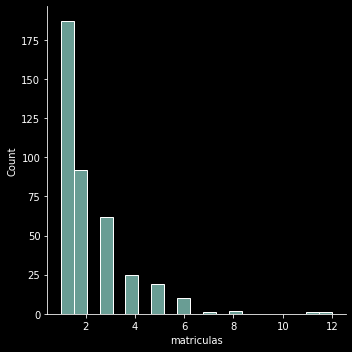

In [467]:
sns.displot(nomes.matriculas)

C:\Users\magno\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

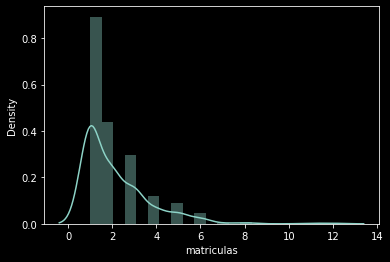

In [468]:
sns.distplot(nomes.matriculas)

In [469]:
nomes.matriculas.value_counts()

1     187
2      92
3      62
4      25
5      19
6      10
8       2
11      1
7       1
12      1
Name: matriculas, dtype: int64

# Selecionando cursos

In [470]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [471]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas): 
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [472]:
matriculas

,id_aluno,id_curso
0,235,16
1,43,18
2,304,7
3,156,20
4,343,16
...,...,...
853,323,12
854,383,17
855,366,8
856,366,12


In [473]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,82,Lógica de programação
2,66,Java para Web
3,12,C# para Web
4,57,Ruby on Rails
5,46,Cursos de Python
6,7,PHP com MySql
7,74,.NET para web
8,55,Novas integrações com Java
9,47,TDD com Java


In [474]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [475]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,82,Lógica de programação
2,66,Java para Web
3,12,C# para Web
4,57,Ruby on Rails
5,46,Cursos de Python
6,7,PHP com MySql
7,74,.NET para web
8,55,Novas integrações com Java
9,47,TDD com Java


# Exportando os resultados em diferentes formatos

In [476]:
matriculas_por_curso.to_csv('dados/matriculas_por_curso.csv', sep=';', index=False)

In [477]:
matriculas_json = matriculas_por_curso.to_json()

In [478]:
matriculas_html = matriculas_por_curso.to_html()

In [479]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>82</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>66</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>12</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>57</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>46</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>7</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>74</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>55</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>47</td>
 

# Criando o banco SQL

In [480]:
!pip install sqlalchemy

In [481]:
from sqlalchemy import create_engine, MetaData, Table

In [482]:
engine = create_engine('sqlite:///:memory:')

In [483]:
engine

Engine(sqlite:///:memory:)

In [484]:
type(engine)

sqlalchemy.engine.base.Engine

In [485]:
matriculas_por_curso.to_sql('matriculas', engine)

20

In [486]:
print(engine.table_names())

['matriculas']


C:\Users\magno\AppData\Local\Temp\ipykernel_33796\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Buscando dados no banco SQL

In [487]:
query = 'select * from matriculas where quantidade_de_alunos < 20' 

In [488]:
import pandas as pd

In [489]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,12,C# para Web
1,6,7,PHP com MySql
2,14,7,Desenvolvendo jogos
3,18,8,Programação funcional
4,19,8,Boas práticas em Java


In [490]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,82
1,Java para Web,66
2,C# para Web,12
3,Ruby on Rails,57
4,Cursos de Python,46
5,PHP com MySql,7
6,.NET para web,74
7,Novas integrações com Java,55
8,TDD com Java,47
9,Código limpo com C#,65


In [491]:
alunos_por_curso = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [492]:
alunos_por_curso.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,82
1,Java para Web,66
6,.NET para web,74
9,Código limpo com C#,65
15,Estatística básica,62


# Escrevendo no banco

In [493]:
muitas_matriculas = alunos_por_curso.query('quantidade_de_alunos > 60')

In [494]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

5

In [495]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


C:\Users\magno\AppData\Local\Temp\ipykernel_33796\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


# Nomes alunos da proxima turma

In [496]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,82,Lógica de programação
2,66,Java para Web
3,12,C# para Web
4,57,Ruby on Rails
5,46,Cursos de Python
6,7,PHP com MySql
7,74,.NET para web
8,55,Novas integrações com Java
9,47,TDD com Java


In [497]:
id_curso = 17

In [498]:
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [499]:
proxima_turma

,id_aluno,id_curso
19,218,17
43,42,17
58,49,17
62,49,17
85,262,17
125,102,17
133,25,17
139,303,17
141,83,17
147,60,17


In [500]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
6,17,CINTIA,@servicodeemail.com,cintia@servicodeemail.com,3
25,17,DANIELE,@dominiodoemail.com.br,daniele@dominiodoemail.com.br,1
26,17,AILTON,@servicodeemail.com,ailton@servicodeemail.com,2
42,17,VANESSA,@servicodeemail.com,vanessa@servicodeemail.com,6
49,17,BEATRIZ,@dominiodoemail.com.br,beatriz@dominiodoemail.com.br,6
49,17,BEATRIZ,@dominiodoemail.com.br,beatriz@dominiodoemail.com.br,6
60,17,FLAVIA,@servicodeemail.com,flavia@servicodeemail.com,4
83,17,ISABEL,@dominiodoemail.com.br,isabel@dominiodoemail.com.br,2
86,17,GUSTAVO,@dominiodoemail.com.br,gustavo@dominiodoemail.com.br,3


In [501]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

In [502]:
proxima_turma = proxima_turma.to_frame()

In [503]:
nome_curso = cursos.loc[id_curso]

In [504]:
nome_curso

nome_do_curso    Internet das coisas
Name: 17, dtype: object

In [505]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Internet das coisas'

In [507]:
proxima_turma = proxima_turma.rename(columns={'nome': 'Alunos do curso de {}'.format(nome_curso)})

# Excel

In [515]:
!pip install openpyxl

In [514]:
proxima_turma.to_excel('dados/Alunos_Proxima_Turma.xlsx', index=False)